**Indian Startup Funding Analysis**

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('startup_funding.csv')
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [38]:
df.isnull().sum()

,0
Sr No,0
Date dd/mm/yyyy,0
Startup Name,0
Industry Vertical,171
SubVertical,936
City Location,180
Investors Name,24
InvestmentnType,4
Amount in USD,960
Remarks,2625


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


# **Data Pre-processing**

In [40]:
#Remark has more than 50% value so drop the entire column
df.drop('Remarks', axis=1, inplace=True)

In [41]:
df.rename(columns={
    'Sr No': 'sr_no',
    'Date dd/mm/yyyy': 'date',
    'Startup Name': 'startup_name',
    'Industry Vertical': 'industry_vertical',
    'SubVertical': 'sub_vertical',
    'City  Location': 'city_location',
    'Investors Name': 'investors_name',
    'InvestmentnType': 'investment_type',
    'Amount in USD': 'amount_usd'
}, inplace=True)

In [42]:
#fix data time
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y', errors='coerce')

#Replace commas
df['amount_usd'] = df['amount_usd'].astype(str).str.replace(',', '', regex=False)
df['amount_usd'] = pd.to_numeric(df['amount_usd'], errors='coerce')
df['amount_usd'].fillna(df['amount_usd'].mean(), inplace=True)

<ipython-input-42-1828320249ea>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['amount_usd'].fillna(df['amount_usd'].mean(), inplace=True)


In [43]:
# drop null from investment type
df.dropna(subset=['investment_type'], inplace=True)
df.dropna(subset=['investors_name'], inplace=True)


In [44]:
df.columns

Index(['sr_no', 'date', 'startup_name', 'industry_vertical', 'sub_vertical',
       'city_location', 'investors_name', 'investment_type', 'amount_usd'],
      dtype='object')

In [45]:
#Random fill
non_null_cities = df['city_location'].dropna().values
df['city_location'] = df['city_location'].apply(lambda x: np.random.choice(non_null_cities) if pd.isna(x) else x)
non_null_sub_vertical = df['sub_vertical'].dropna().values
df['sub_vertical'] = df['sub_vertical'].apply(lambda x: np.random.choice(non_null_sub_vertical) if pd.isna(x) else x)
non_null_industry_vertical = df['industry_vertical'].dropna().values
df['industry_vertical'] = df['industry_vertical'].apply(lambda x: np.random.choice(non_null_industry_vertical) if pd.isna(x) else x)

In [46]:
# forward fill data column
df['date'] = df['date'].fillna(method='ffill')

<ipython-input-46-ed55166b458f>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['date'] = df['date'].fillna(method='ffill')


In [47]:
df.head()

,sr_no,date,startup_name,industry_vertical,sub_vertical,city_location,investors_name,investment_type,amount_usd
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


In [48]:
df.isnull().sum()

,0
sr_no,0
date,0
startup_name,0
industry_vertical,0
sub_vertical,0
city_location,0
investors_name,0
investment_type,0
amount_usd,0


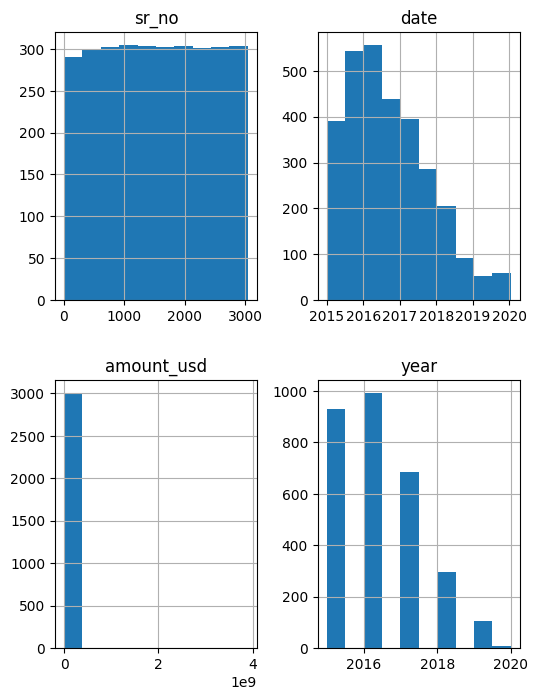

In [66]:
#show the data distribution using histogram plot
df.hist(figsize=(6,8))
plt.show()

# **Exploratory Data Analysis (EDA)**

<ipython-input-59-75dd930ab35c>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




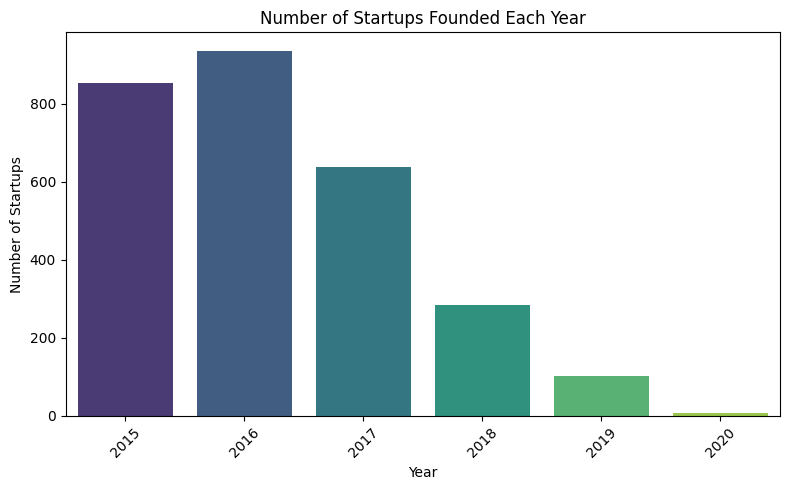

In [59]:
#Number of Startups Founded Each year
df['year'] = df['date'].dt.year
yearly_startups = df.groupby('year')['startup_name'].nunique().reset_index()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=yearly_startups, x='year', y='startup_name', palette='viridis')
plt.title("Number of Startups Founded Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Startups")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [56]:
#Funding amount over time
funding_trend = df.groupby('year')['amount_usd'].sum().reset_index()

#Plot
px.line(funding_trend, x='year', y='amount_usd', title="Funding Amount Over Time")

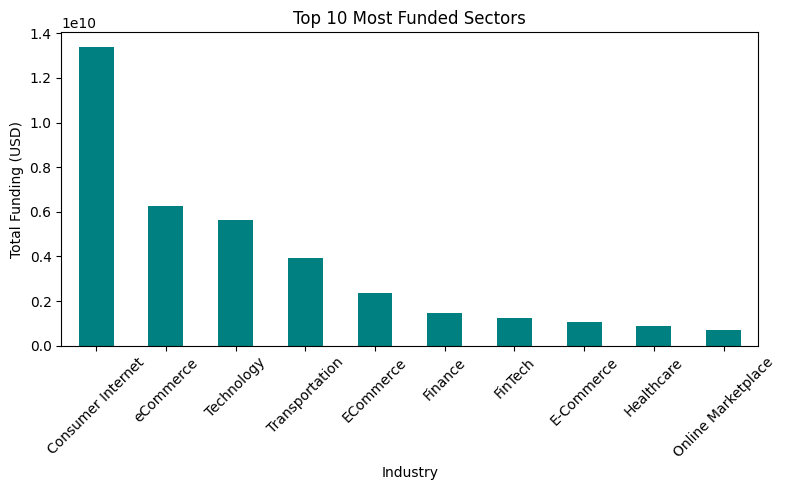

In [58]:
#Most Funded sector
sector_funding = df.groupby('industry_vertical')['amount_usd'].sum().sort_values(ascending=False).head(10)

# Plot
sector_funding.plot(kind='bar', figsize=(8,5), color='teal')
plt.title("Top 10 Most Funded Sectors")
plt.ylabel("Total Funding (USD)")
plt.xlabel("Industry")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
# Most Funded Regions
region_funding = df.groupby('city_location')['amount_usd'].sum().sort_values(ascending=False).head(10)

px.bar(region_funding, x=region_funding.index, y=region_funding.values,
  title="Top 10 Cities by Total Funding", labels={'x':'City', 'y':'Total Funding'})

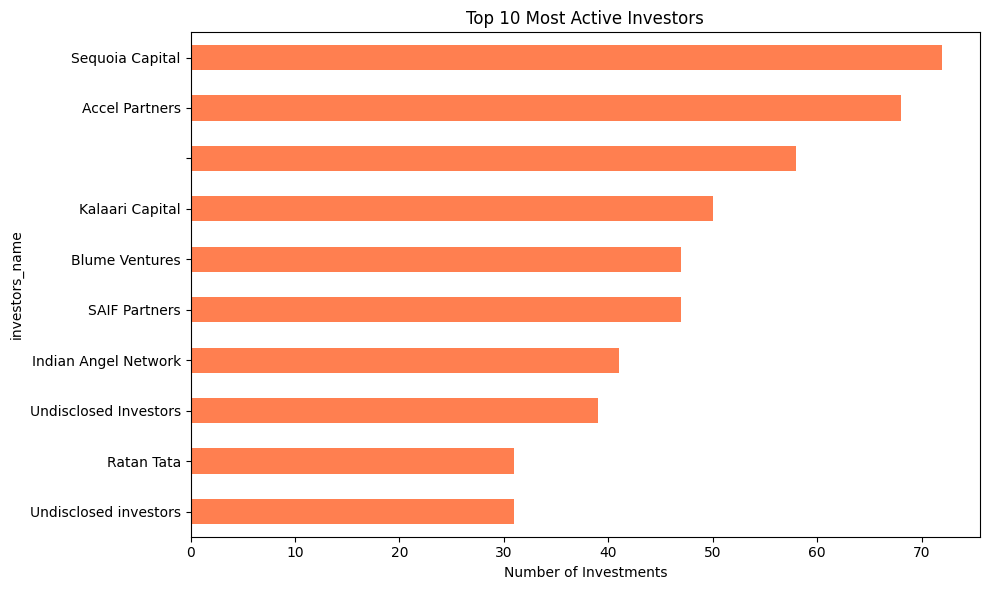

In [62]:
#Investor Trends
investor_count = df['investors_name'].str.split(',').explode().str.strip().value_counts().head(10)

# Plot
investor_count.plot(kind='barh', figsize=(10,6), color='coral')
plt.title("Top 10 Most Active Investors")
plt.xlabel("Number of Investments")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

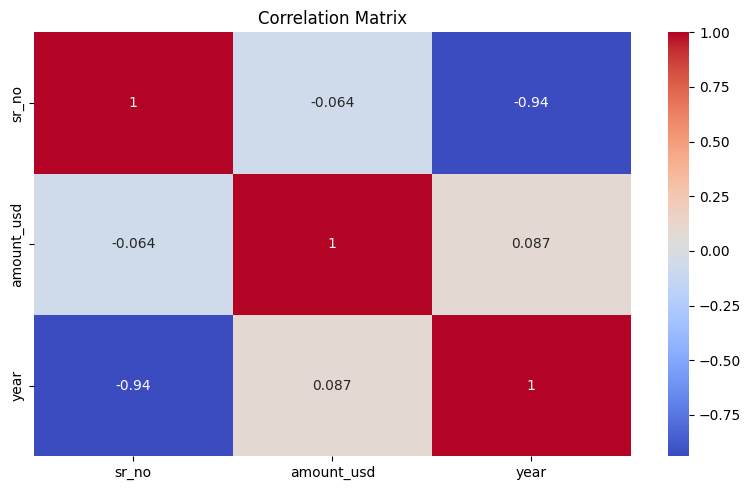

In [63]:
#Correlation Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# **Key Insights:**

# Most Funded Industries:

  * Consumer Internet, E-commerce, Technology, and Transportation emerged as the most funded sectors.

  * These sectors received significantly higher investments compared to others, indicating investor confidence in tech-driven and scalable business models.

  * Insight:
    The shift towards digital solutions has made these industries lucrative, especially post-2015 with rising internet penetration and mobile usage.

# Cities with Maximum Funding

  * Bengaluru, Mumbai, Delhi NCR, and Gurugram dominate the startup ecosystem in terms of both number of funded startups and total funding raised.

  * Insight:
  These cities offer strong infrastructure, incubators, and proximity to investors, making them ideal hubs for startup growth.

# Funding Trends Over the Years:

  * A steep rise in funding was seen between 2015 and 2017.
  * A slight dip in 2020, likely due to COVID-19.

  * Insight:
    Economic changes and government initiatives (like Startup India) had a visible impact on funding trends.

# Most Active Investors:

  * Sequoia Capital, Accel Partners, Kalaari Capital, and Blume Ventures Network were the most active.
  * These investors frequently participated in early-stage funding rounds.

  * Insight:
    A few investors dominate early-stage investments, showing a centralized funding ecosystem.

# Patterns & Anomalies:

  * Many startups have undisclosed investor details, suggesting a need for more transparent reporting.
  * A large number of deals are in early stages like Seed or Series A, indicating a nascent market still maturing.

  **Anomaly:**

  * A few records show unusually high funding amounts not matching the typical range—possible outliers or data errors.
  * Missing location or date entries could affect trend accuracy if not cleaned.